<a href="https://colab.research.google.com/github/LuisCastroV/ADA-Informes/blob/main/Informe3_MaxSubArrayMid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de Suma Máxima de Sub-Arreglos (MaxSubArrayMid y MaxSubArray)
---
**Entrada:**  Lista de n números $[a_1,a_2,...,a_n]$.

**Entrada para el informe:**  Lista de 6 números $[-1,3,4,-5,9,-2]$.

**Salida**: La suma máxima del sub-arreglo $[a_i,...,a_j]$, donde el índice de la suma máxima del sub-arreglo izquierdo es reflejado como i y el índice de la suma máxima del sub-arreglo derecho es reflejado como j.

**Salida para el informe:**  La suma máxima del sub-arreglo $[3,4,-5,9]$ es 11, donde el índice de la suma máxima del sub-arreglo izquierdo es 1 y el índice de la suma máxima del sub-arreglo derecho es 4.

---
**Imagen referencial de la suma máxima de sub-arreglo usando el método divide y vencerás:**
![image](https://media.geeksforgeeks.org/wp-content/uploads/maximum-subarray-sum-is-7.jpg)

**Breve información:** El problema del sub-arreglo máximo fue propuesto por Ulf Grenander en 1977 como un modelo simplificado para la estimación de máxima verosimilitud de patrones en imágenes digitalizadas. El enfoque divide a tu enemigo para que puedas reinar se atribuye a Julio César, él lo aplicó con éxito para conquistar la Galia hace veintidós siglos. Se aplica a los algoritmos que reducen cada problema a un solo subproblema, como el algoritmo de búsqueda binaria para encontrar un registro en una lista ordenada.



#1.1. Algunas aplicaciones del método *divide y vencerás*:

**Quicksort**: es un algoritmo de ordenamiento, este elige un elemento pivote, reordena los elementos del arreglo de forma que todos los elementos de menor valor al del elemento pivote se mueven hacia su izquierda y los elementos de mayor valor hacia su derecha. Finalmente, ordena los sub-arreglos recursivamente hacia la izquierda y derecha del elemento pivote.

**Merge Sort**: es un algoritmo de ordenamiento, este algoritmo divide el arreglo en dos partes, ordenada cada una de ellas recursivamente, y finalmente une las dos partes ya ordenadas. 

**Búsqueda Binaria**: es un algoritmo de búsqueda, en cada paso, el algoritmo compara el parámetro de entrada "x" con el valor del elemento en la mitad del arreglo. Si los valores coinciden, retorna el índice del elemento medio. De lo contrario, si x es mayor al elemento medio, el algoritmo recurre a la mitad izquierda del elemento medio, de lo contrario retorna la mitad a la derecha del elemento medio.



# 2. MaxSubArrayMid y MaxSubArray

El siguiente código muestra una implementación del algoritmo **divide y vencerás** para encontrar la suma máxima de un sub-arreglo.

# 2.1. Código 

In [1]:
def MaxSubArrayMid(arr, l, m, h,verbose=False):
  #Elementos de izquierda al medio.
  sm = 0
  left_sum = float("-inf")
  cross_star=m
  for i in range(m, l-1, -1):
    sm = sm + arr[i]
    if (sm > left_sum):
        left_sum = sm
        cross_star=i
  #Elementos del medio a la derecha.
  smm = 0
  right_sum =  float("-inf")
  cross_end=m+1
  for i in range(m+1, h):
    smm = smm + arr[i]
    if (smm > right_sum):
        right_sum = smm
        cross_end=i+1
  #Retorna index de inicio, index final y la suma de los valores del maximo sub-arreglo.
  return cross_star,cross_end,right_sum+left_sum


def MaxSubArray(arr, l, h,verbose=False):
  t=0
  if (l == h-1):
      return l,h,arr[l]
  #Buscar punto medio.
  m = (l + h) // 2
  
  left_start,left_end,left_max=MaxSubArray(arr,l,m)
  right_start,right_end,right_max=MaxSubArray(arr,m,h)
  cross_start,cross_end,cross_max=MaxSubArrayMid(arr,l,m,h,verbose)
  if(left_max > right_max and left_max > cross_max):
    if verbose:
      print("Suma por la izquierda =",left_max)
    return left_start,left_end,left_max
  elif(right_max > left_max and right_max > cross_max):
    if verbose:
      print("Suma por la derecha =",right_max)
    return right_start,right_end,right_max
  else:
    if verbose:
      print("Suma por medio =",cross_max)
    return cross_start,cross_end,cross_max

#Ejemplo
arr = [-1, 3, 4, -5, 9,-2]
print("Arreglo inicial",arr)
n = len(arr)
start,end,max_sum = MaxSubArray(arr, 0, n)
print("El sub-arreglo máximo comienza en el índice",start,end=", ")
print("termina en el índice",end-1,end=", ")
print("y tiene una suma de",max_sum,end=".")
print("\nSub-arreglo de la suma",arr[start:end])



Arreglo inicial [-1, 3, 4, -5, 9, -2]
El sub-arreglo máximo comienza en el índice 1, termina en el índice 4, y tiene una suma de 11.
Sub-arreglo de la suma [3, 4, -5, 9]


# 2.2. Descripción del algoritmo

Para encontrar solución al problema de la suma máxima del sub-arreglo se utiliza el algoritmo **divide y vencerás**:
1. Divide la lista dada en dos mitades.
2. Calcula la suma máxima de los sub-arreglos de:
  - La mitad izquierda (recursiva).
  - La mitad derecha (recursiva).
3. Encuentra la suma máxima del sub-arreglo que cruza el punto medio.
4. Devuelve la suma de los puntos anteriores.


Se encuentra el punto medio de un arreglo, luego se considera el sub-arreglo $A[i,mid]$ y $A[mid+1,j]$.
El sub-arreglo máximo contiguo se puede encontrar entre tres lugares:
1. Completamente en el sub-arreglo del lado izquierdo $A[i,mid]$.
2. Completamente en el sub-arreglo del lado derecho $A[mid+1,j]$.
3. Cruzando el punto medio $A[i,j]$.

Encontrada la ubicación del sub-arreglo máximo en estos tres lugares, debido al algoritmo *divide y vencerás* se devolvera el sub-arreglo máximo del sub-arreglo izquierdo y derecho.

Pero se necesita el sub-arreglo máximo de un arreglo fijo, se necesita verificar que un sub-arreglo cruce el punto medio y este contendra los elementos de izquierda y derecha.

Para encontrar la suma máxima se comienza desde el punto medio y terminando en algún punto a la izquierda del medio, luego se realiza la suma máxima comenzando desde el medio + 1 y terminando con algún punto a la derecha del medio + 1. Finalmente, retorna los dos indices y la suma del maximo sub-arreglo.

# 2.3. Ejemplo

Consideremos, por ejemplo, el arreglo:

$a=[3,-1,-1,10,-3,-2,4]$

Se procede a calcular el medio del arreglo, donde el número del medio es 10.

Se procede a iterar hasta dejar a todos los elementos en una casilla para empezar a revisarlos:

$Izquierda=[3],[-1],[-1],[10]$

$Derecha=[-3],[-2],[4]$

A continuacion de ese proceso, empieza la sumatoria:

$Izquierda$ = Se empieza con el número del medio, ubicado en la casilla 3, a evaluar, se tiene 10 > "0" es verdadero, entonces la variable *sm del código* tomará el valor 10, se vuelve a realizar una suma ahora con el número que esta en la casilla 2, que es el -1, 10 - 1 = 9 < *sm del código*, es falso, el siguiente valor a evaluar es la casilla 1, que es -1, 9 - 1 = 8 < *sm del código*, falso otra vez y finalmente se llega al ultimo elemento del arreglo ubicado en la casilla 0 es 3, 8 + 3 = 11 > *sm del código*, verdadero, entonces *sm del código* toma el valor de 11 por el lado izquierdo.


$Derecha$ = Se empieza con el número del medio + 1, ubicado en la casilla 4, a evaluar, se tiene -3 > "0" es falso, entonces la variable *sm del código* se mantiene, se vuelve a realizar una suma ahora con el número que esta en la casilla 5, que es el -2, -3 -2 = -5 > *sm del código*, es falso, el siguiente valor a evaluar es la casilla final 6, que es 4, -5 + 4 = -1 > *sm del código*, falso otra vez manteniendo el 0.

Finalmente se realiza la suma de ambos lados arrojando 11.


#2.4. Ejecución del algoritmo (verbose=True)

In [2]:
import random
a = random.sample(range(-100, 100), 7)
print("Arreglo inicial=",a)
n=len(a)
start,end,max_sum= MaxSubArray(a,0,n,True)


Arreglo inicial= [-75, -85, -38, 4, 98, -23, 32]
Suma por medio = 111


#3. Tiempo de ejecución 

#3.1. Teorema (tiempo de ejecución)

El algoritmo **divide y vencerás** para el problema del sub-arreglo máximo consiste en dividir el arreglo por la mitad por el índice del medio, realizando llamadas recursivas en cada uno de los dos sub-arreglos para encontrar el sub-arreglo máximo en la mitad izquierda y mitad derecha, con esa premisa podemos determinar que: 

***T(n)=*** \begin{cases}
  O(1)  & n \text{ es 1} \\
  2 T(n/2) + O(n) & n \text{ es más de 1 elemento}
\end{cases}

Usando el teorema maestro visto en clases, se puede identificar que corresponde al caso número 1 donde a=b^d, por ende, podemos determinar que el tiempo de complejidad es = **O(n*logn)**

#4. Correctitud

#4.1. Correctitud MaxSubArray

La función *MaxSubArray* recibe el arreglo de n elementos, con el objetivo de encontrar el subarreglo máximo, retornando los índices $i$ y $j$ tal que  y la suma máxima.

## Prueba del Teorema
Para poder probar el teorema, utilizaremos la **inducción matemática**, ya que el algoritmo contiene recursividad.

Para probar una declaración $P(n)$ en inducción matemática, debemos:

1. Probar $P(n)$ para un caso base, por ejemplo P(1)
2. Probar que si $P(m)$ es cierto $m < n$, entonces $P(n)$ también lo es.

> **Caso Base:** En este caso, el arreglo contiene sólo un elemento, como es el único retornandolo inmediatamente, por lo que podemos deducir que corresponde a la máxima suma que se puede generar.
>
> **Caso Promedio:** En el caso promedio, la función iterativamente divide el arreglo en 2, teniendo así $a = n/2$ y $b = n/2$. Cómo la función  es recursiva, llegará al caso base, retornando sólo un elemento. Como el algoritmo encuentra la suma máxima y cada arreglo tiene tamaño n/2, se asume que el paso inductivo es correcto ya que $1 < a < b < n$.

Cómo el caso base y el caso promedio son correctos y la función retorna un subarreglo que maximiza la suma, el teorema de correctitud es correcto.

#4.2. Correctitud MaxSubArrayMid

Ya que la función *MaxSubArrayMid* itera de distinta forma según el caso, para probar el teorema utilizaremos la **propiedad invariante**.

> **Inicialización:** Al comienzo de la iteración, las variables de suma para la mitad izquierda y derecha comienzan con el valor de $- ∞$ asegurandonos que antes de revisar los elementos la suma de estos será mayor, así asumiendo que el subarreglo contiene la máxima suma.
>
> **Mantención:** Durante la iteración, sólo en caso que la suma de los elementos sea mayor a nuestra variable fija (right_sum o left_sum) se irán actualizando, es por esto que en todo momento estará guardada la suma máxima. Retornando la máxima suma entre los 3 casos, la del subarreglo derecho, izquierdo o el cruce en el punto medio.

#5. Experimento

#5.1. Código de Kadane

In [3]:
import datetime
from math import log
import matplotlib.pyplot as plt
from timeit import repeat
%matplotlib inline

def maxSubArraySumKAD(arr,size):
    suma_pasada = arr[0]
    suma = 0
    for i in range(0, size):
        suma = suma + arr[i]
        if suma < 0:
            suma = 0
        elif (suma_pasada < suma):
            suma_pasada = suma        
    return suma_pasada

#5.2. Tiempo de ejecución (experimental)
En los siguientes gráficos se reportan los tiempos de ejecución del algoritmo **Divide y vencerás** y del algoritmo de **Kadane** en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre 5 y 500.

#5.2.1. Algoritmo de divide y vencerás

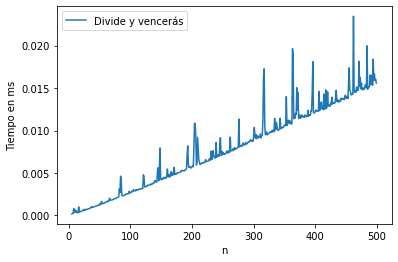

In [4]:
w=[]; r=[]

for j in range(5,500):

  e = random.sample(range(1, 1000), j)

  l = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({e},0,{j})", repeat=1, number=10)

  w.append(j)
  r.append(l)


plt.plot(w,r)
plt.legend(["Divide y vencerás"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

#5.2.2. Algoritmo de Kadane

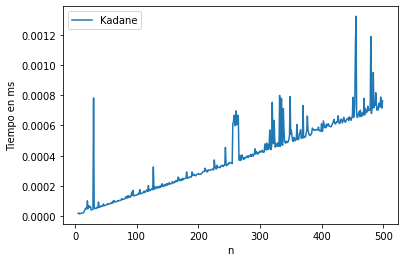

In [5]:
x=[]; y=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

  t = repeat(setup="from __main__ import maxSubArraySumKAD", stmt=f"maxSubArraySumKAD({a},{n})", repeat=1, number=10)

  x.append(n)
  y.append(t)


plt.plot(x,y)
plt.legend(["Kadane"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

Se puede observar que en el algoritmo de Kadane el tiempo de ejecución en milisegundos va en un rango de 0.0000 a 0.00175, en cambio el algoritmo de divide y vencerás va en un rango de 0.000 a 0.025 con la misma unidad de medida, esto nos quiere decir que el algoritmo de Kadane es más eficiente que el algoritmo de divide y vencerás en relacion a el problema de encontrar la suma máxima de un sub-arreglo.